In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Plot Data

In [2]:
data = pd.read_csv('ex1data1.txt', header = None, sep=',')

In [3]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values
m = len(y)# number of training examples
X = X.reshape(m,1)
y = y.reshape(m,1)

<IPython.core.display.Javascript object>


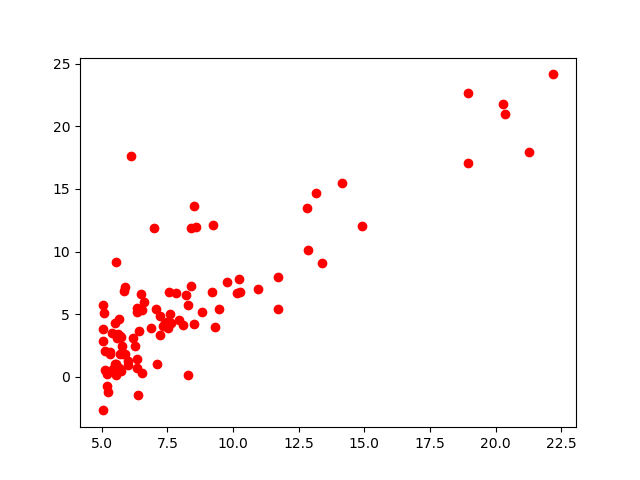

In [4]:
%matplotlib notebook
fig = plt.figure()
plt.plot(X,y,'ro')
plt.show()

# Gradient Descent 

In [5]:
X = np.hstack((np.ones((m,1)),X)) #Add a column of ones to X
theta = np.zeros((2,1))           #Initialize theta

In [6]:
iterations = 1500;
alpha = 0.01;#Learning Rate

##### Function for computing cost

In [7]:
def computeCost(X, y, theta):
    m = len(y) # number of training examples
    J = 0
    h = X @ theta
    J = np.sum(np.multiply((h-y),(h-y)),axis=0)/(2*m)
    return J   

### Computing Cost 

In [8]:
J = computeCost(X,y,theta)
print('Computed cost with theta = [[0],[0]]: {}'.format(J))

Computed cost with theta = [[0],[0]]: [32.07273388]


In [9]:
J = computeCost(X,y, [[-1],[2]])
print('Computed cost with theta = [[-1],[2]]: {}'.format(J))

Computed cost with theta = [[-1],[2]]: [54.24245508]


##### Function for gradient descent

In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    
    for i in range(num_iters):
        h = X @ theta
        derivative = (1/m)*(np.transpose((h-y)) @ X)
        theta = theta - alpha * np.transpose(derivative)
        
        J_history[i] = computeCost(X, y, theta)
        
    return theta,J_history
        

### Gradient Descent

In [11]:
theta,J_history = gradientDescent(X, y, theta, alpha, iterations)

In [12]:
theta

array([[-3.63029144],
       [ 1.16636235]])

# Plotting Linear Fit

<IPython.core.display.Javascript object>


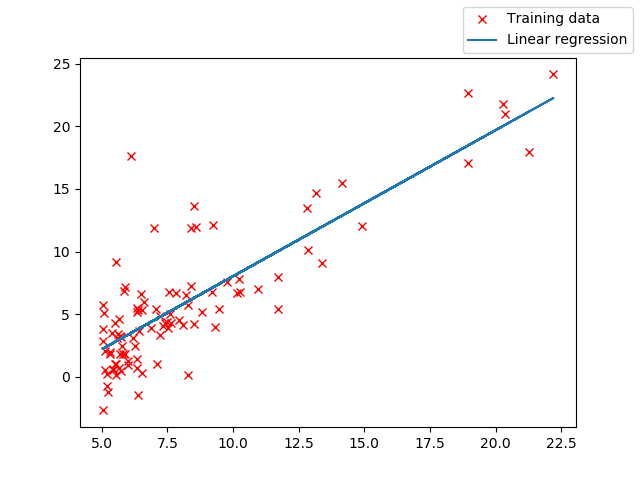

In [13]:
predictions = X @ theta
fig = plt.figure()
plt.plot(X[:,1].reshape(m,1),y,'rx', label = 'Training data')
plt.plot(X[:,1].reshape(m,1),predictions, label = 'Linear regression')
fig.legend()
plt.show()

# Visualizing J(theta_0, theta_1) 

In [14]:
theta_zero = np.arange(-10,10,0.2)
theta_one = np.arange(-10,10,0.2)
J_vals = np.zeros((len(theta_zero),len(theta_one)))

<IPython.core.display.Javascript object>


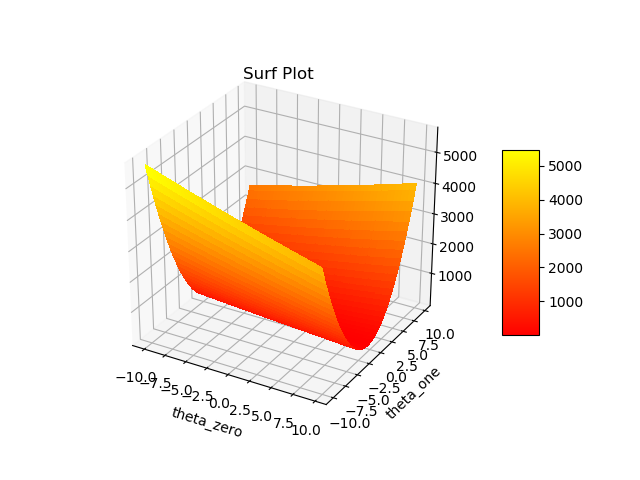

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
theta_zero_mesh, theta_one_mesh = np.meshgrid(theta_zero, theta_one)

for i in range(len(theta_zero)):
    for j in range(len(theta_one)):
        t = np.array([[theta_zero[i]],[theta_one[j]]])
        J_vals[i,j] = computeCost(X,y,t)
        
surf = ax.plot_surface(theta_zero_mesh, theta_one_mesh, np.transpose(J_vals), cmap=cm.autumn, linewidth=1, antialiased=False)
plt.title('Surf Plot')
plt.xlabel('theta_zero')
plt.ylabel('theta_one')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### Contour plot 

<IPython.core.display.Javascript object>


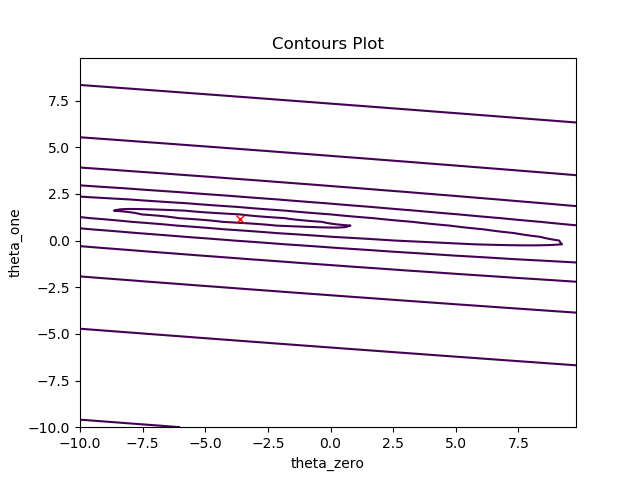

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(theta_zero_mesh,theta_one_mesh, np.transpose(J_vals),np.logspace(-4, 10, 30))
plt.plot(theta[0],theta[1],'rx')
plt.title('Contours Plot')
plt.xlabel('theta_zero')
plt.ylabel('theta_one')
plt.show()